<a href="https://colab.research.google.com/github/as-bestinclass/anand4MahiGaming/blob/main/scenario_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Scenario II
Question 1: Forecast if the number of spins will go up or down.  
Explain what forecasting method/algorithm you used.
Provide a visualization of the data.
The data point collected on 6/3/2022 and 6/10/2022 are not full day data points.

##Load Data

In [ ]:
import pandas as pd

In [40]:
df = pd.read_csv('/content/Scenario II.csv')

In [41]:
df

,timestamp,Spins
0,6/3/2022 0:00,1258427
1,6/4/2022 0:00,2502763
2,6/5/2022 0:00,2150601
3,6/6/2022 0:00,2125557
4,6/7/2022 0:00,6858133
5,6/8/2022 0:00,5877120
6,6/9/2022 0:00,5501333
7,6/10/2022 0:00,2877442


In [28]:
df.dtypes

timestamp    object
Spins         int64
dtype: object

In [42]:
#lets make sure the timestamp column is in correct datatype

df['timestamp'] = pd.to_datetime(df['timestamp'], format='%m/%d/%Y %H:%M')

In [30]:
df['timestamp']

0   2022-06-03
1   2022-06-04
2   2022-06-05
3   2022-06-06
4   2022-06-07
5   2022-06-08
6   2022-06-09
7   2022-06-10
Name: timestamp, dtype: datetime64[ns]

##Visualize Data

In [31]:
import matplotlib.pyplot as plt

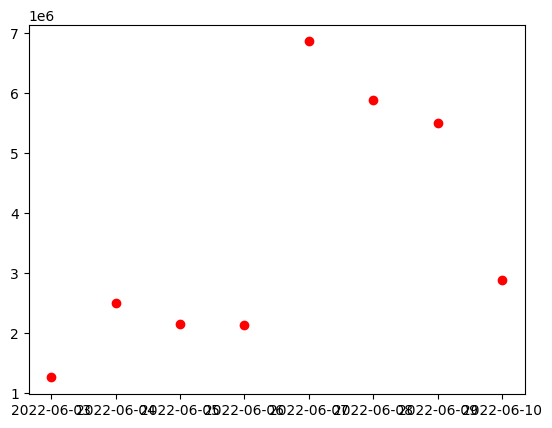

In [32]:
#scatterplot
plt.scatter(x=df['timestamp'], y=df['Spins'], c = 'red')

<Axes: xlabel='timestamp', ylabel='Spins'>

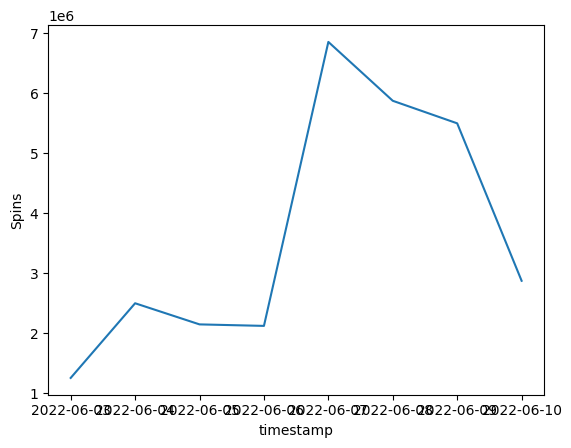

In [23]:
#lineplot using seaborn
import seaborn as sns
sns.lineplot(x=df['timestamp'], y=df['Spins'], data=df)

In [43]:
df

,timestamp,Spins
0,2022-06-03,1258427
1,2022-06-04,2502763
2,2022-06-05,2150601
3,2022-06-06,2125557
4,2022-06-07,6858133
5,2022-06-08,5877120
6,2022-06-09,5501333
7,2022-06-10,2877442


#Alternatives

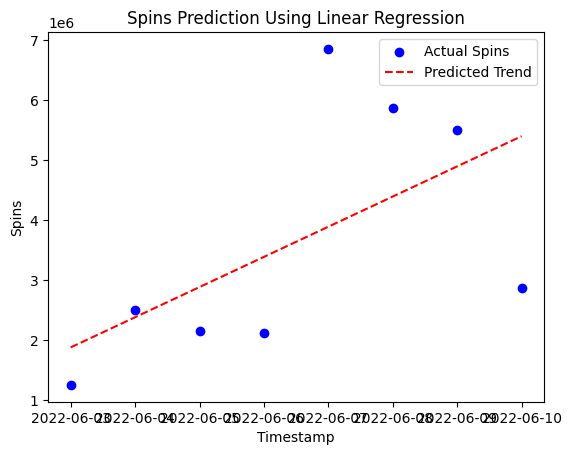

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
data = {'timestamp': ['2022-06-03', '2022-06-04', '2022-06-05', '2022-06-06', '2022-06-07', '2022-06-08', '2022-06-09', '2022-06-10'],
        'Spins': [1258427, 2502763, 2150601, 2125557, 6858133, 5877120, 5501333, 2877442]}
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Prepare data for regression model
X = np.array(range(len(df))).reshape(-1, 1)  # Days as features
y = df['Spins'].values  # Spins as target variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
df['Prediction'] = model.predict(X)

# Plotting
plt.scatter(df['timestamp'], df['Spins'], color='blue', label='Actual Spins')
plt.plot(df['timestamp'], df['Prediction'], color='red', linestyle='--', label='Predicted Trend')
plt.xlabel('Timestamp')
plt.ylabel('Spins')
plt.title('Spins Prediction Using Linear Regression')
plt.legend()
plt.show()


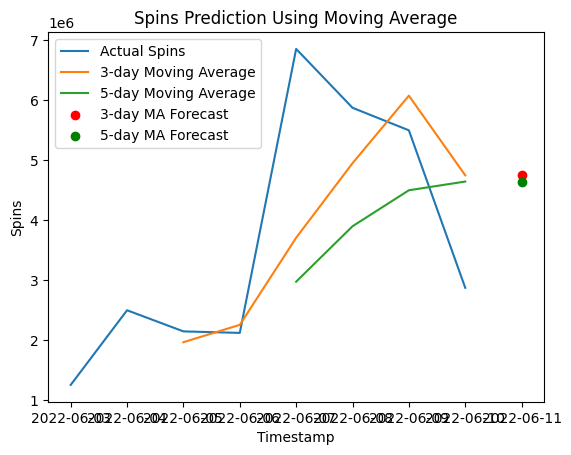

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {'timestamp': ['2022-06-03', '2022-06-04', '2022-06-05', '2022-06-06', '2022-06-07', '2022-06-08', '2022-06-09', '2022-06-10'],
        'Spins': [1258427, 2502763, 2150601, 2125557, 6858133, 5877120, 5501333, 2877442]}
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Calculate 3-day moving average
df['3_day_MA'] = df['Spins'].rolling(window=3).mean()

# Calculate 5-day moving average
df['5_day_MA'] = df['Spins'].rolling(window=5).mean()

# Forecast using the most recent 3-day moving average
forecast_3_day = df['3_day_MA'].iloc[-1]

# Forecast using the most recent 5-day moving average
forecast_5_day = df['5_day_MA'].iloc[-1]

# Plotting
plt.plot(df['timestamp'], df['Spins'], label='Actual Spins')
plt.plot(df['timestamp'], df['3_day_MA'], label='3-day Moving Average')
plt.plot(df['timestamp'], df['5_day_MA'], label='5-day Moving Average')
plt.scatter(df['timestamp'].iloc[-1] + pd.Timedelta(days=1), forecast_3_day, color='red', label='3-day MA Forecast')
plt.scatter(df['timestamp'].iloc[-1] + pd.Timedelta(days=1), forecast_5_day, color='green', label='5-day MA Forecast')
plt.xlabel('Timestamp')
plt.ylabel('Spins')
plt.title('Spins Prediction Using Moving Average')
plt.legend()
plt.show()


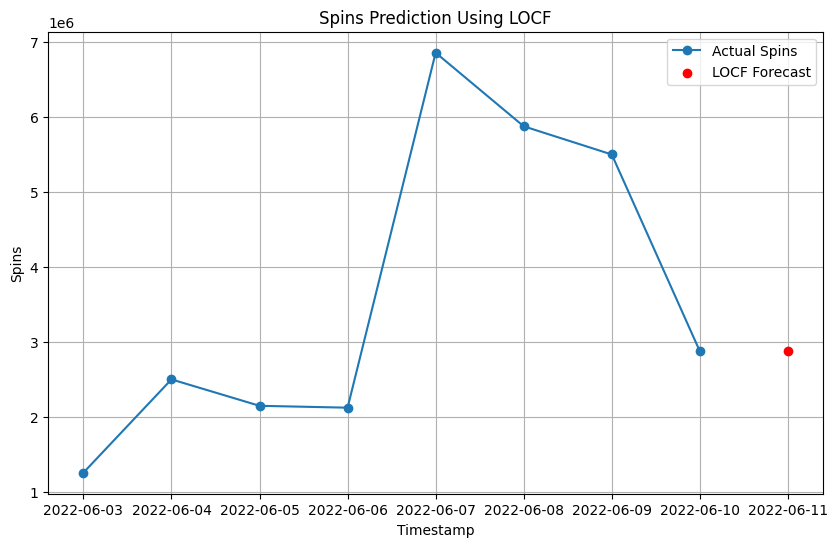

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {'timestamp': ['2022-06-03', '2022-06-04', '2022-06-05', '2022-06-06', '2022-06-07', '2022-06-08', '2022-06-09', '2022-06-10'],
        'Spins': [1258427, 2502763, 2150601, 2125557, 6858133, 5877120, 5501333, 2877442]}
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Last Observation Carried Forward (LOCF)
last_observation = df['Spins'].iloc[-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['Spins'], marker='o', label='Actual Spins')
plt.scatter(df['timestamp'].iloc[-1] + pd.Timedelta(days=1), last_observation, color='red', zorder=5, label='LOCF Forecast')
plt.xlabel('Timestamp')
plt.ylabel('Spins')
plt.title('Spins Prediction Using LOCF')
plt.legend()
plt.grid(True)
plt.show()
